# Covid Status
This Data Science project by Sven Oberwalder and Yasin Sahin analyzes the development of the corona pandemic based on input data provided by Statistik Austria

The Datasets can be found here:
### [Dataset 1](https://data.statistik.gv.at/web/meta.jsp?dataset=OGD_covidggstatus2_GGSTATUS_2)

### [Dataset 2](https://data.statistik.gv.at/web/meta.jsp?dataset=OGD_covidggstatus_GGSTATUS_1)

In [135]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Initial Data Analysis and Import
Dataset 1 has following attributes:
* **C-BEZIMST-0** Politischer Bezirk (PolBez)
* **C-ALTGRIMST-0** 5-years age group (Altersgr)
* **C-GLIMST-0** Country of Birth (GebLand)
* **C-C11-0** Sex (Geschl)
* **C-IMST-0** COVID-19 vaccinated-recovered-status (GeimpftGenesen)
* **F-DATA** Number of records (Anz)

Dataset 2 has following attributes:
* **C-B00-0** Federal country (Bundesland)
* **C-BILIMST-0** Education (Bildung)
* **C-ALTGRIMST-0** 5-years age group (Altersgr)
* **C-ESIMST-0** Economic status (ErwerbStatus)
* **C-IMST-0** COVID-19 vaccinated-recovered-status (GeimpftGenesen)
* **F-DATA** Number of records (Anz)

In below code, the datasets need to be imported and the attributes must be renamed to more meaningful names. Since the data is separated by semi-colons (;), we need to specify that when importing the csv-files. Furthermore, a simple Std-Analysis has to be conducted, to ensure the progress.

In [136]:
#import databases
dataset1 = pd.read_csv("./data/dataset1.csv", sep=";")
dataset2 = pd.read_csv("./data/dataset2.csv", sep=";")

#rename attributes
dataset1.rename(columns={"C-BEZIMST-0": "PolBez",
                         "C-ALTGRIMST-0": "Altersgr",
                         "C-GLIMST-0": "GebLand",
                         "C-C11-0": "Geschl",
                         "C-IMST-0": "GeimpftGenesen",
                         "F-DATA": "Anz"}, inplace=True)
dataset2.rename(columns={"C-B00-0": "Bundesland",
                         "C-BILIMST-0": "Bildung",
                         "C-ALTGRIMST-0": "Altersgr",
                         "C-ESIMST-0": "ErwerbStatus",
                         "C-IMST-0": "GeimpftGenesen",
                         "F-DATA": "Anz"}, inplace=True)


## Std-Analysis for Dataset 1

In [137]:
dataset1.sample(5)

,PolBez,Altersgr,GebLand,Geschl,GeimpftGenesen,Anz
41270,BEZIMST-904,ALTGRIMST-8,GLIMST-2,C11-2,IMST-1,202
39781,BEZIMST-804,ALT10IMST-8,GLIMST-1,C11-2,IMST-1,2691
10753,BEZIMST-307,ALT10IMST-9,GLIMST-1,C11-2,IMST-4,255
9380,BEZIMST-304,ALT10IMST-6,GLIMST-1,C11-1,IMST-1,1076
51404,B00-4,ALTGRIMST-7,GLIMST-1,C11-1,IMST-3,8853


In [138]:
dataset1.head(5)

,PolBez,Altersgr,GebLand,Geschl,GeimpftGenesen,Anz
0,BEZIMST-101,ALTGRIMST-1,GLIMST-1,C11-1,IMST-1,1
1,BEZIMST-101,ALTGRIMST-1,GLIMST-1,C11-1,IMST-3,80
2,BEZIMST-101,ALTGRIMST-1,GLIMST-1,C11-1,IMST-4,216
3,BEZIMST-101,ALTGRIMST-1,GLIMST-1,C11-2,IMST-1,2
4,BEZIMST-101,ALTGRIMST-1,GLIMST-1,C11-2,IMST-3,86


In [139]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53961 entries, 0 to 53960
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PolBez          53961 non-null  object
 1   Altersgr        53961 non-null  object
 2   GebLand         53961 non-null  object
 3   Geschl          53961 non-null  object
 4   GeimpftGenesen  53961 non-null  object
 5   Anz             53961 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.5+ MB


In [140]:
dataset1.describe()

,Anz
count,53961.000000
mean,642.049703
std,2171.148389
min,1.000000
25%,44.000000
50%,169.000000
75%,508.000000
max,70338.000000


## Std-Analysis for Dataset 2

In [141]:
dataset2.sample(5)

,Bundesland,Bildung,Altersgr,ErwerbStatus,GeimpftGenesen,Anz
1333,B00-9,BILIMST-3,ALT10IMST-7,ESIMST-1,IMST-2,6723
446,B00-3,BILIMST-99,ALT10IMST-5,ESIMST-2,IMST-2,4
1032,B00-7,BILIMST-4,ALT10IMST-4,ESIMST-2,IMST-2,741
1055,B00-7,BILIMST-4,ALT10IMST-7,ESIMST-2,IMST-1,1396
272,B00-2,BILIMST-4,ALT10IMST-7,ESIMST-1,IMST-3,614


In [142]:
dataset2.head(5)

,Bundesland,Bildung,Altersgr,ErwerbStatus,GeimpftGenesen,Anz
0,B00-1,BILIMST-1,ALT10IMST-4,ESIMST-1,IMST-1,611
1,B00-1,BILIMST-1,ALT10IMST-4,ESIMST-1,IMST-2,285
2,B00-1,BILIMST-1,ALT10IMST-4,ESIMST-1,IMST-3,396
3,B00-1,BILIMST-1,ALT10IMST-4,ESIMST-1,IMST-4,472
4,B00-1,BILIMST-1,ALT10IMST-4,ESIMST-2,IMST-1,471


In [143]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Bundesland      1404 non-null   object
 1   Bildung         1404 non-null   object
 2   Altersgr        1404 non-null   object
 3   ErwerbStatus    1404 non-null   object
 4   GeimpftGenesen  1404 non-null   object
 5   Anz             1404 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 65.9+ KB


In [144]:
dataset2.describe()

,Anz
count,1404.000000
mean,3414.423789
std,5746.310880
min,1.000000
25%,310.500000
50%,1375.500000
75%,3926.000000
max,55581.000000


# Data Cleaning
In this section, the input data will be cleaned. For this manner, any wrong, missing, or irrelevant informations will be treated accordingly.

**To Be marked**
The Column ``Altersgr`` uses an age gap interval of 10 years to inform us about the age of the adresses person. However, the first interval currently named ``ALT10IMST-1`` only has a 5 year gap (from 0 - 4 years) to especially adress babys and small children

### Dataset 1

In [ ]:
geimpftGenesenDict = {"IMST-4": "nothing",  #nothing
                       "IMST-1": "vacc",  #vaccinated
                       "IMST-3": "recov",  #recovered
                       "IMST-2": "vacc + recov"} #vaccinated + recovered

ageGapDict = {"ALT10IMST-1": "0 - 4",
              "ALT10IMST-2": "5 - 14",
              "ALT10IMST-3": "15 - 24",
              "ALT10IMST-4": "25 - 34",
              "ALT10IMST-5": "35 - 44",
              "ALT10IMST-6": "45 - 54",
              "ALT10IMST-7": "55 - 64",
              "ALT10IMST-8": "65 - 74",
              "ALT10IMST-9": "75 - 84",
              "ALT10IMST-10": "85+"}

dataset1["GebLand"] = dataset1["GebLand"].map({"GLIMST-1": "INLAND",
                                               "GLIMST-2": "AUSLAND"})

dataset1["Geschl"] = dataset1["Geschl"].map({"C11-1": "m",
                                             "C11-2": "f"})

dataset1["GeimpftGenesen"] = dataset1["GeimpftGenesen"].map(geimpftGenesenDict)

dataset1["Altersgr"] = dataset1["Altersgr"].map(ageGapDict)

dataset1.sample(10)

### Dataset 2

In [ ]:
bundeslandDict = {
    "B00-1": "Burgenland",
    "B00-2": "Kärnten",
    "B00-3": "Niederösterreich",
    "B00-4": "Oberösterreich",
    "B00-5": "Salzburg",
    "B00-6": "Steiermark",
    "B00-7": "Tirol",
    "B00-8": "Vorarlberg",
    "B00-9": "Wien"
}

dataset2["Bundesland"] = dataset2["Bundesland"].map(bundeslandDict)

#uses the dictionary geimpftGenesenDict from the previous code block
dataset2["GeimpftGenesen"] = dataset2["GeimpftGenesen"].map(geimpftGenesenDict)

dataset2["Bildung"] = dataset2["Bildung"].map({"BILIMST-1": "Pflichtschule",
                                               "BILIMST-2": "Lehrabschluss/BMS",
                                               "BILIMST-3": "BHS/AHS/Kolleg",
                                               "BILIMST-4": "Akademie/Hochschule",
                                               "BILIMST-99": "N/A"})

dataset2["ErwerbStatus"] = dataset2["ErwerbStatus"].map({"ESIMST-1": "aktiv",
                                                         "ESIMST-2": "inaktiv"})

#uses the dictionary ageGapDict from the previous code block
dataset2["Altersgr"] = dataset2["Altersgr"].map(ageGapDict)

dataset2.sample(10)

## Duplicate Data

In [ ]:
dataset1["Anz"].sum()

In the above code we can see that the sum of records is approximately 4 times the total population of Austria. This strongly suggests that there may be duplicate data. And exactly that is the case: In ``PolBez`` there are records for each province and also for each federal country. This duplicate is not necessary, since one province can easily be assigned to its federal country (e.g. ``BEZIMST-304`` (= Wiener Neustadt) must be in ``B00-3`` (=Niederoesterreich)). So the records for the federal countries can be removed.

In [ ]:
dataset1 = dataset1.loc[dataset1["PolBez"].map(lambda val: "BEZIMST" in val)] #only provinces have the prefix BEZIMST
dataset1["Anz"].sum()

The above code still returns an amount which is twice as big as Austria's population. Similairly, the column ``Altersgr`` has duplicate records for different age groups. Previously we maped `Altersgr` to an more readable string, but left out the duplicate values that will be deleted in the next step so we can simply drop the N/A records.

In [ ]:
dataset1 = dataset1.dropna()
dataset1["Anz"].sum()

Now we have removed all duplicate values. Let's continue cleaning our data.
## Null Values

In [ ]:
dataset1.isnull().sum()

In [ ]:
dataset2.isnull().sum()

Since there are no null values, we can continue!

In [ ]:
dataset2["Bildung"].value_counts()

After this we are done cleaning our data and can save it into two datasets. ``korr1.csv`` for ``dataset1.csv`` and ``korr2.csv`` for ``dataset2.csv``

In [ ]:
dataset1.to_csv("./output/korr1.csv", sep=";", index=False)
dataset2.to_csv("./output/korr2.csv", sep=";", index=False)

Now, lets look at our corrected values...

In [ ]:
korr1 = pd.read_csv("./output/korr1.csv", sep=";")
korr2 = pd.read_csv("./output/korr2.csv", sep=";")

korr1.head(5)

In [ ]:
korr2.head(5)

# Data Preparation
## Numerical Values
### Dataset 1
For ``Polbez`` we take the number in the value code (so ``BEZIMST-340`` will be converted into ``340``)
For ``Altersgr`` we take the mean value from the min and max of the age group (except for 85, it will stay 85 since there is no max)
For ``GebLand`` we take 0 for ``INLAND`` and 1 for ``AUSLAND``
For ``Geschl`` we take 0 for ``m`` and 1 for ``f``
For ``GeimpftGenesen`` we take 0 for ``nothing``, 1 for vaccinated, 2 for recovered, and 3 (1+2) for both vaccinated and recovered


In [ ]:
altersgrToNumeric = {"0 - 4": 2.0,
                     "5 - 14": 9.5,
                     "15 - 24": 19.5,
                     "25 - 34": 29.5,
                     "35 - 44": 39.5,
                     "45 - 54": 49.5,
                     "55 - 64": 59.5,
                     "65 - 74": 69.5,
                     "75 - 84": 79.5,
                     "85+": 85.0}

geimpftGenesenToNumeric = {"nothing": 0,  #nothing
                      "vacc": 1,  #vacc
                      "recov": 2,  #recov
                      "vacc + recov": 3} #vacc + recov

geblandToNumeric = dict((v, k) for k, v in enumerate(korr1["GebLand"].unique()))
geschlToNumeric = dict((v, k) for k, v in enumerate(korr1["Geschl"].unique()))

korr1["PolBez"] = korr1["PolBez"].map(lambda val: int(val[-3:]))
korr1["Altersgr"] = korr1["Altersgr"].map(altersgrToNumeric)
korr1["GebLand"] = korr1["GebLand"].map(geblandToNumeric)
korr1["Geschl"] = korr1["Geschl"].map(geschlToNumeric)
korr1["GeimpftGenesen"] = korr1["GeimpftGenesen"].map(geimpftGenesenToNumeric)

korr1.sample(5)


### Dataset 2

In [ ]:

korr2["Altersgr"] = korr2["Altersgr"].map(altersgrToNumeric)
korr2["GeimpftGenesen"] = korr2["GeimpftGenesen"].map(geimpftGenesenToNumeric)

# Visualisation with Seaborn

Generate custom selected color palette handpicked with the finest colors in the world just for you Mr. Wöhrer! **<3**

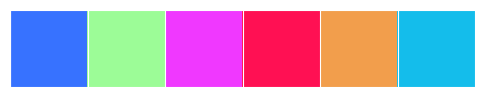

In [63]:
colors = ["#3772FF", "#9CFC97", "#F038FF", "#FF1053", "#F29E4C", "#14BDEB"]
colorPallet = sns.set_palette(colors)
sns.palplot(sns.color_palette())
plt.show()